Mean Squared Error: 0.9116159861275015
R-squared: 0.9998260785370023


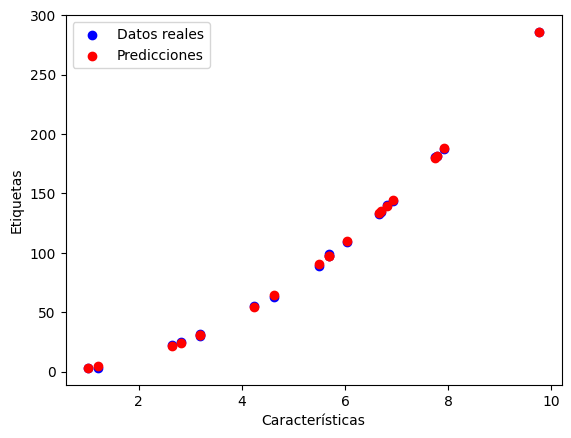

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generar datos sintéticos
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Características en el rango de 0 a 10
y = 3 * X**2 + np.random.randn(100, 1)  # Relación cuadrática con ruido

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear características polinómicas de grado 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con las características polinómicas
model.fit(X_train_poly, y_train)

# Hacer predicciones
y_pred = model.predict(X_test_poly)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualizar los resultados
plt.scatter(X_test, y_test, color='b', label='Datos reales')
plt.scatter(X_test, y_pred, color='r', label='Predicciones')
plt.xlabel('Características')
plt.ylabel('Etiquetas')
plt.legend()
plt.show()
